<a href="https://colab.research.google.com/github/simranxkaur/Semantic-Segmentation-of-Satellite-Imagery/blob/milestone-3/Milestone3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
%cd gdrive/MyDrive/301Project/

/content/gdrive/MyDrive/301Project


In [5]:
%cd 228repo/

/content/gdrive/MyDrive/301Project/228repo


In [6]:
%pip install patchify
%pip install segmentation_models

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 50 kB 6.0 MB/s 


In [7]:
%pip install hyperopt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [8]:
from hyperopt import hp
from hyperopt import fmin, pyll, tpe, hp, STATUS_OK, Trials

Segmentation Models: using `keras` framework.
semanticData
semanticData/Tile 2
semanticData/Tile 2/images
Now patchifying image: semanticData/Tile 2/images/image_part_001.jpg
Now patchifying image: semanticData/Tile 2/images/image_part_002.jpg
Now patchifying image: semanticData/Tile 2/images/image_part_003.jpg
Now patchifying image: semanticData/Tile 2/images/image_part_004.jpg
Now patchifying image: semanticData/Tile 2/images/image_part_005.jpg
Now patchifying image: semanticData/Tile 2/images/image_part_006.jpg
Now patchifying image: semanticData/Tile 2/images/image_part_007.jpg
Now patchifying image: semanticData/Tile 2/images/image_part_008.jpg
Now patchifying image: semanticData/Tile 2/images/image_part_009.jpg
semanticData/Tile 2/masks
semanticData/Tile 6
semanticData/Tile 6/masks
semanticData/Tile 6/images
Now patchifying image: semanticData/Tile 6/images/image_part_001.jpg
Now patchifying image: semanticData/Tile 6/images/image_part_002.jpg
Now patchifying image: semanticData/

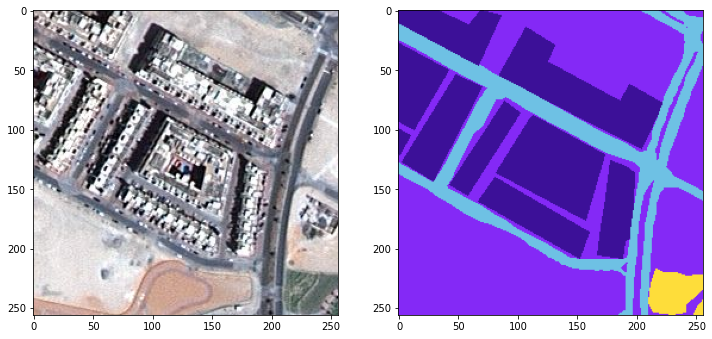

60
Unique labels in label dataset are:  [0 1 2 3 4 5]
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 256, 256, 16  448         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 dropout (Dropout)              (None, 256, 256, 16  0           ['conv2d[0][0]']                 
                                )       

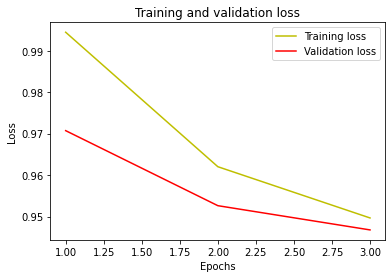

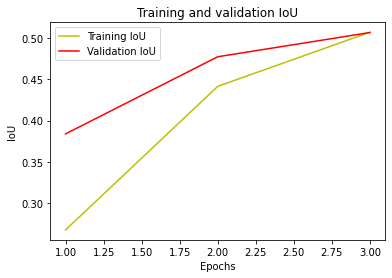

9/9 [==============================] - 1s 20ms/step
(17104896, 1)
(17104896, 1)


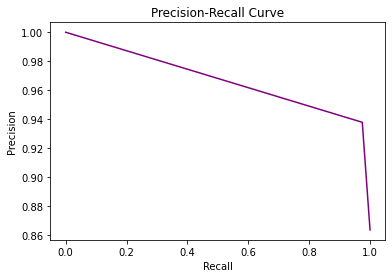

Mean IoU = 0.41336343
1/1 [==============================] - 0s 182ms/step


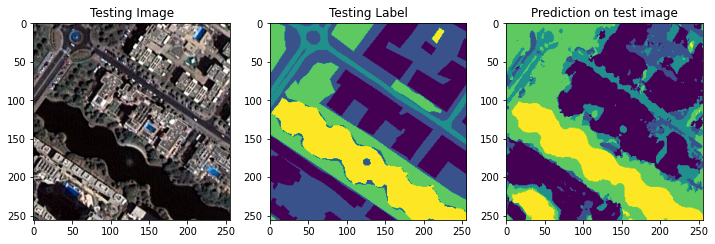

1/1 [==============================] - 0s 19ms/step


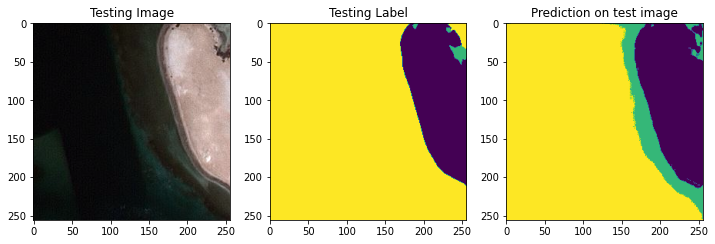

1/1 [==============================] - 0s 20ms/step


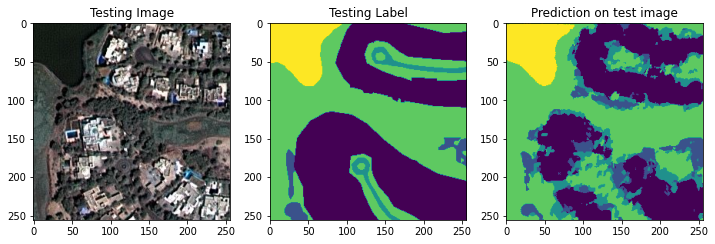

1/1 [==============================] - 0s 19ms/step


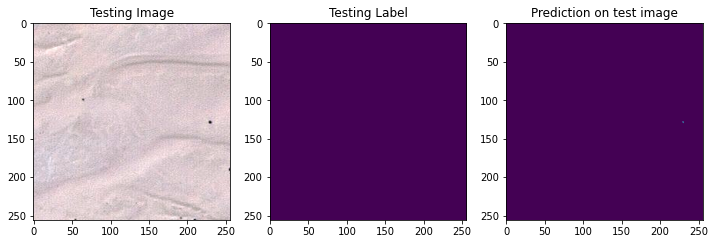

1/1 [==============================] - 0s 19ms/step


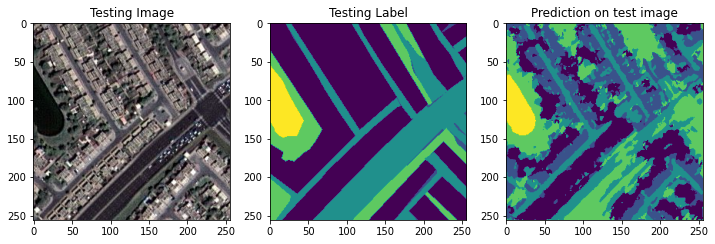

  0%|          | 0/200 [00:00<?, ?it/s, best loss: ?]


RuntimeError: ignored

In [11]:
%run improved_training.py

In [14]:
from hyperopt import fmin, hp, tpe, Trials, space_eval, STATUS_OK

# redefine the function usng a wider range of hyperparameters
def objective(search_space):
    model = get_model()
    model.compile(optimizer='adam', loss=total_loss, metrics=metrics)
    history1 = model.fit(X_train, y_train, 
                    batch_size = 16, 
                    verbose=1, 
                    epochs=100,
                    validation_data=(X_test, y_test), 
                    shuffle=False)
    y_pred = model.predict(X_test)
    accuracy = jacard_coef(y_test, y_pred)
    return {'loss': -accuracy, 'status': STATUS_OK}
# new search space

search_space= {'n_classes':hp.choice('n_classes',[4,5,6]),
              
              'IMG_HEIGHT': hp.choice('IMG_HEIGHT',[256,512]),           
            
              'IMG_WIDTH':hp.choice('IMG_WIDTH',[256,512]),   
             'IMG_CHANNELS':hp.choice('IMG_CHANNELS',[1,2,3])
             }
      
# implement Hyperopt
best_params = fmin(
  fn=objective,
  space=search_space,
  algo=tpe.suggest,
  max_evals=5)

Streaming output truncated to the last 5000 lines.
66/66 [==============================] - 3s 49ms/step - loss: 0.8868 - accuracy: 0.8868 - jacard_coef: 0.7629 - val_loss: 0.9130 - val_accuracy: 0.8466 - val_jacard_coef: 0.7062

Epoch 76/100

66/66 [==============================] - 3s 50ms/step - loss: 0.8873 - accuracy: 0.8849 - jacard_coef: 0.7587 - val_loss: 0.9114 - val_accuracy: 0.8505 - val_jacard_coef: 0.7158

Epoch 77/100

66/66 [==============================] - 3s 49ms/step - loss: 0.8863 - accuracy: 0.8878 - jacard_coef: 0.7646 - val_loss: 0.9125 - val_accuracy: 0.8494 - val_jacard_coef: 0.7148

Epoch 78/100

66/66 [==============================] - 3s 49ms/step - loss: 0.8861 - accuracy: 0.8878 - jacard_coef: 0.7652 - val_loss: 0.9134 - val_accuracy: 0.8467 - val_jacard_coef: 0.7094

Epoch 79/100

66/66 [==============================] - 3s 49ms/step - loss: 0.8855 - accuracy: 0.8891 - jacard_coef: 0.7671 - val_loss: 0.9102 - val_accuracy: 0.8549 - val_jacard_coef: 0.7218

In [15]:
space_eval(search_space, best_params)

{'IMG_CHANNELS': 2, 'IMG_HEIGHT': 256, 'IMG_WIDTH': 512, 'n_classes': 6}

semanticData
semanticData/Tile 2
semanticData/Tile 2/images
Now patchifying image: semanticData/Tile 2/images/image_part_001.jpg
Now patchifying image: semanticData/Tile 2/images/image_part_002.jpg
Now patchifying image: semanticData/Tile 2/images/image_part_003.jpg
Now patchifying image: semanticData/Tile 2/images/image_part_004.jpg
Now patchifying image: semanticData/Tile 2/images/image_part_005.jpg
Now patchifying image: semanticData/Tile 2/images/image_part_006.jpg
Now patchifying image: semanticData/Tile 2/images/image_part_007.jpg
Now patchifying image: semanticData/Tile 2/images/image_part_008.jpg
Now patchifying image: semanticData/Tile 2/images/image_part_009.jpg
semanticData/Tile 2/masks
semanticData/Tile 6
semanticData/Tile 6/masks
semanticData/Tile 6/images
Now patchifying image: semanticData/Tile 6/images/image_part_001.jpg
Now patchifying image: semanticData/Tile 6/images/image_part_002.jpg
Now patchifying image: semanticData/Tile 6/images/image_part_003.jpg
Now patchifyi

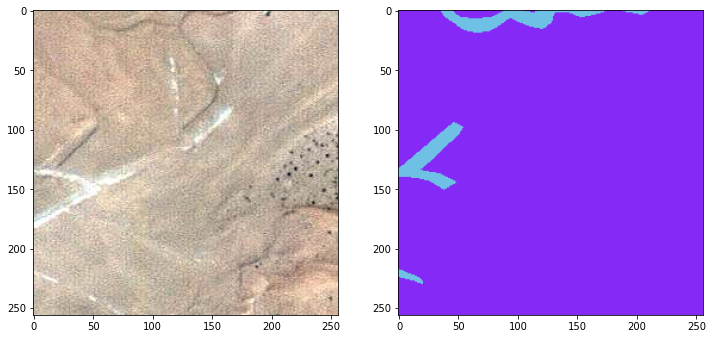

60
Unique labels in label dataset are:  [0 1 2 3 4 5]
Model: "model_10"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_11 (InputLayer)          [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_190 (Conv2D)            (None, 256, 256, 16  448         ['input_11[0][0]']               
                                )                                                                 
                                                                                                  
 dropout_90 (Dropout)           (None, 256, 256, 16  0           ['conv2d_190[0][0]']             
                                )    

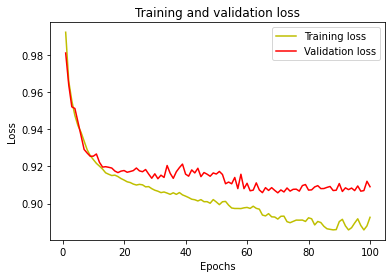

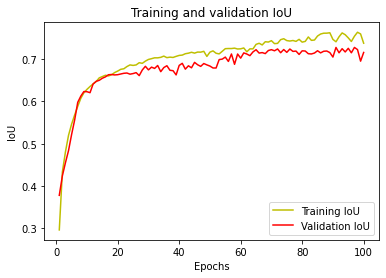

9/9 [==============================] - 0s 22ms/step
(17104896, 1)
(17104896, 1)


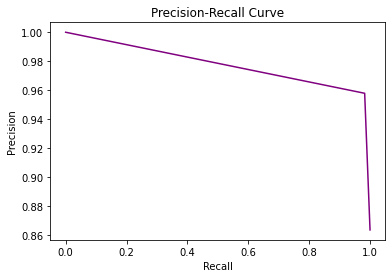

Mean IoU = 0.5907703
1/1 [==============================] - 0s 19ms/step


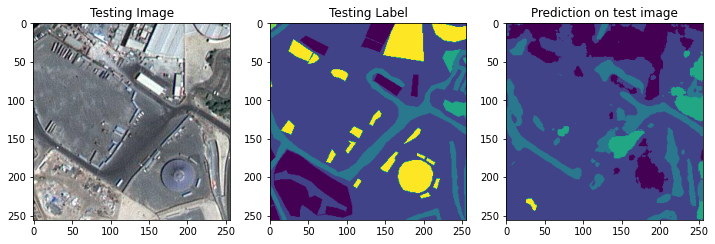

1/1 [==============================] - 0s 19ms/step


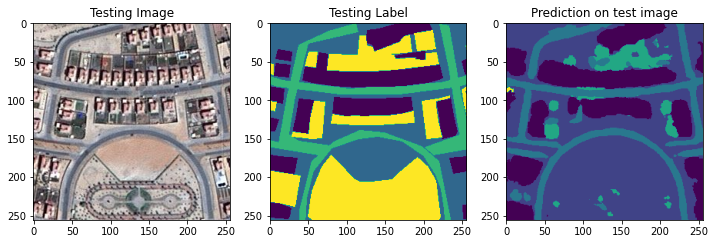

1/1 [==============================] - 0s 20ms/step


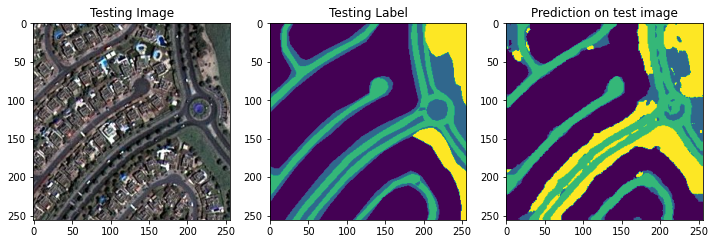

1/1 [==============================] - 0s 20ms/step


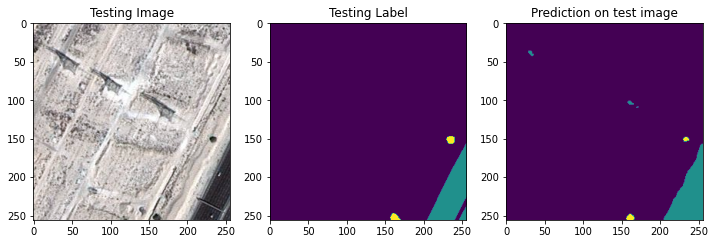

1/1 [==============================] - 0s 20ms/step


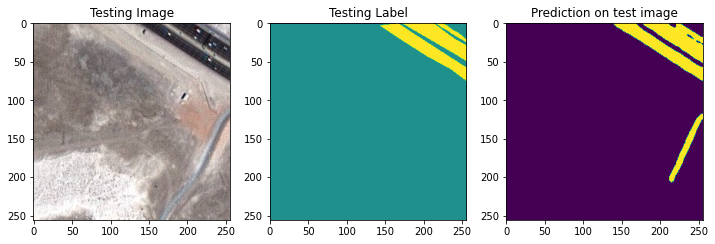

1/1 [==============================] - 0s 20ms/step


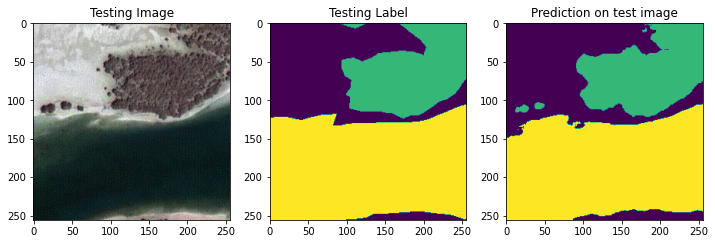

1/1 [==============================] - 0s 19ms/step


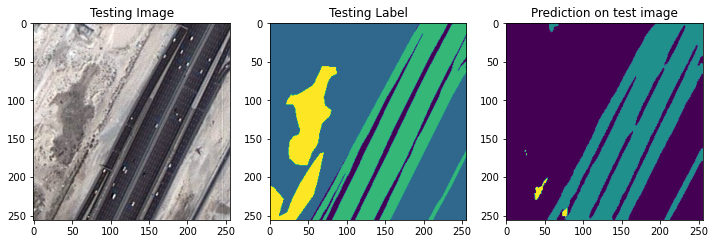

1/1 [==============================] - 0s 20ms/step


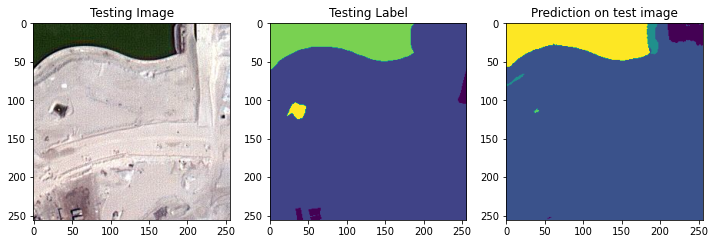

1/1 [==============================] - 0s 20ms/step


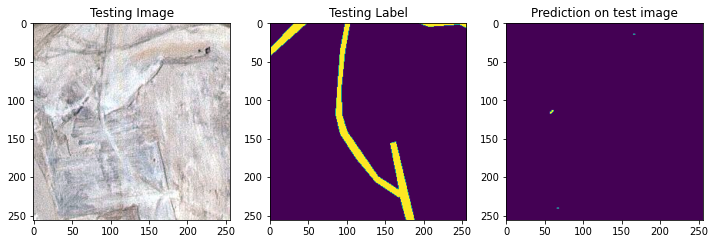

1/1 [==============================] - 0s 20ms/step


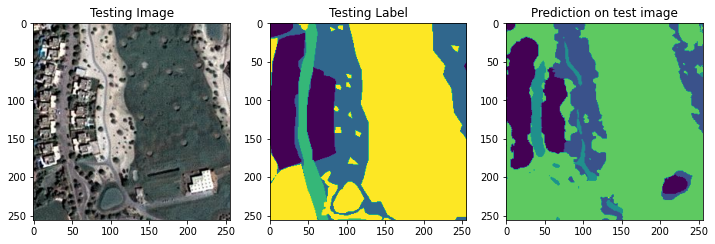

In [17]:
%run improved_training.py